Dataset Import


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv


In [2]:
df = pd.read_csv('../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
for col in df.columns:
    if(df[col].isnull().sum()>0):
        print(col)
# NO missing value

Classes are almost balanced. We can get away with the difference.
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


<Axes: title={'center': 'Label'}, xlabel='label'>

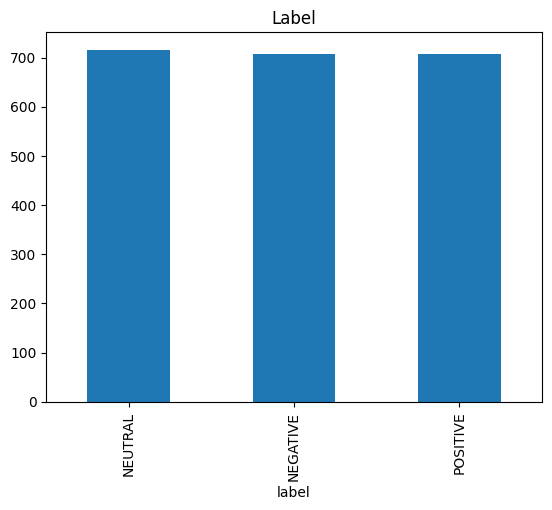

In [4]:
print(f'Classes are almost balanced. We can get away with the difference.\n{df.label.value_counts()}')
df.label.value_counts().plot(kind='bar', color='tab:blue', title='Label')

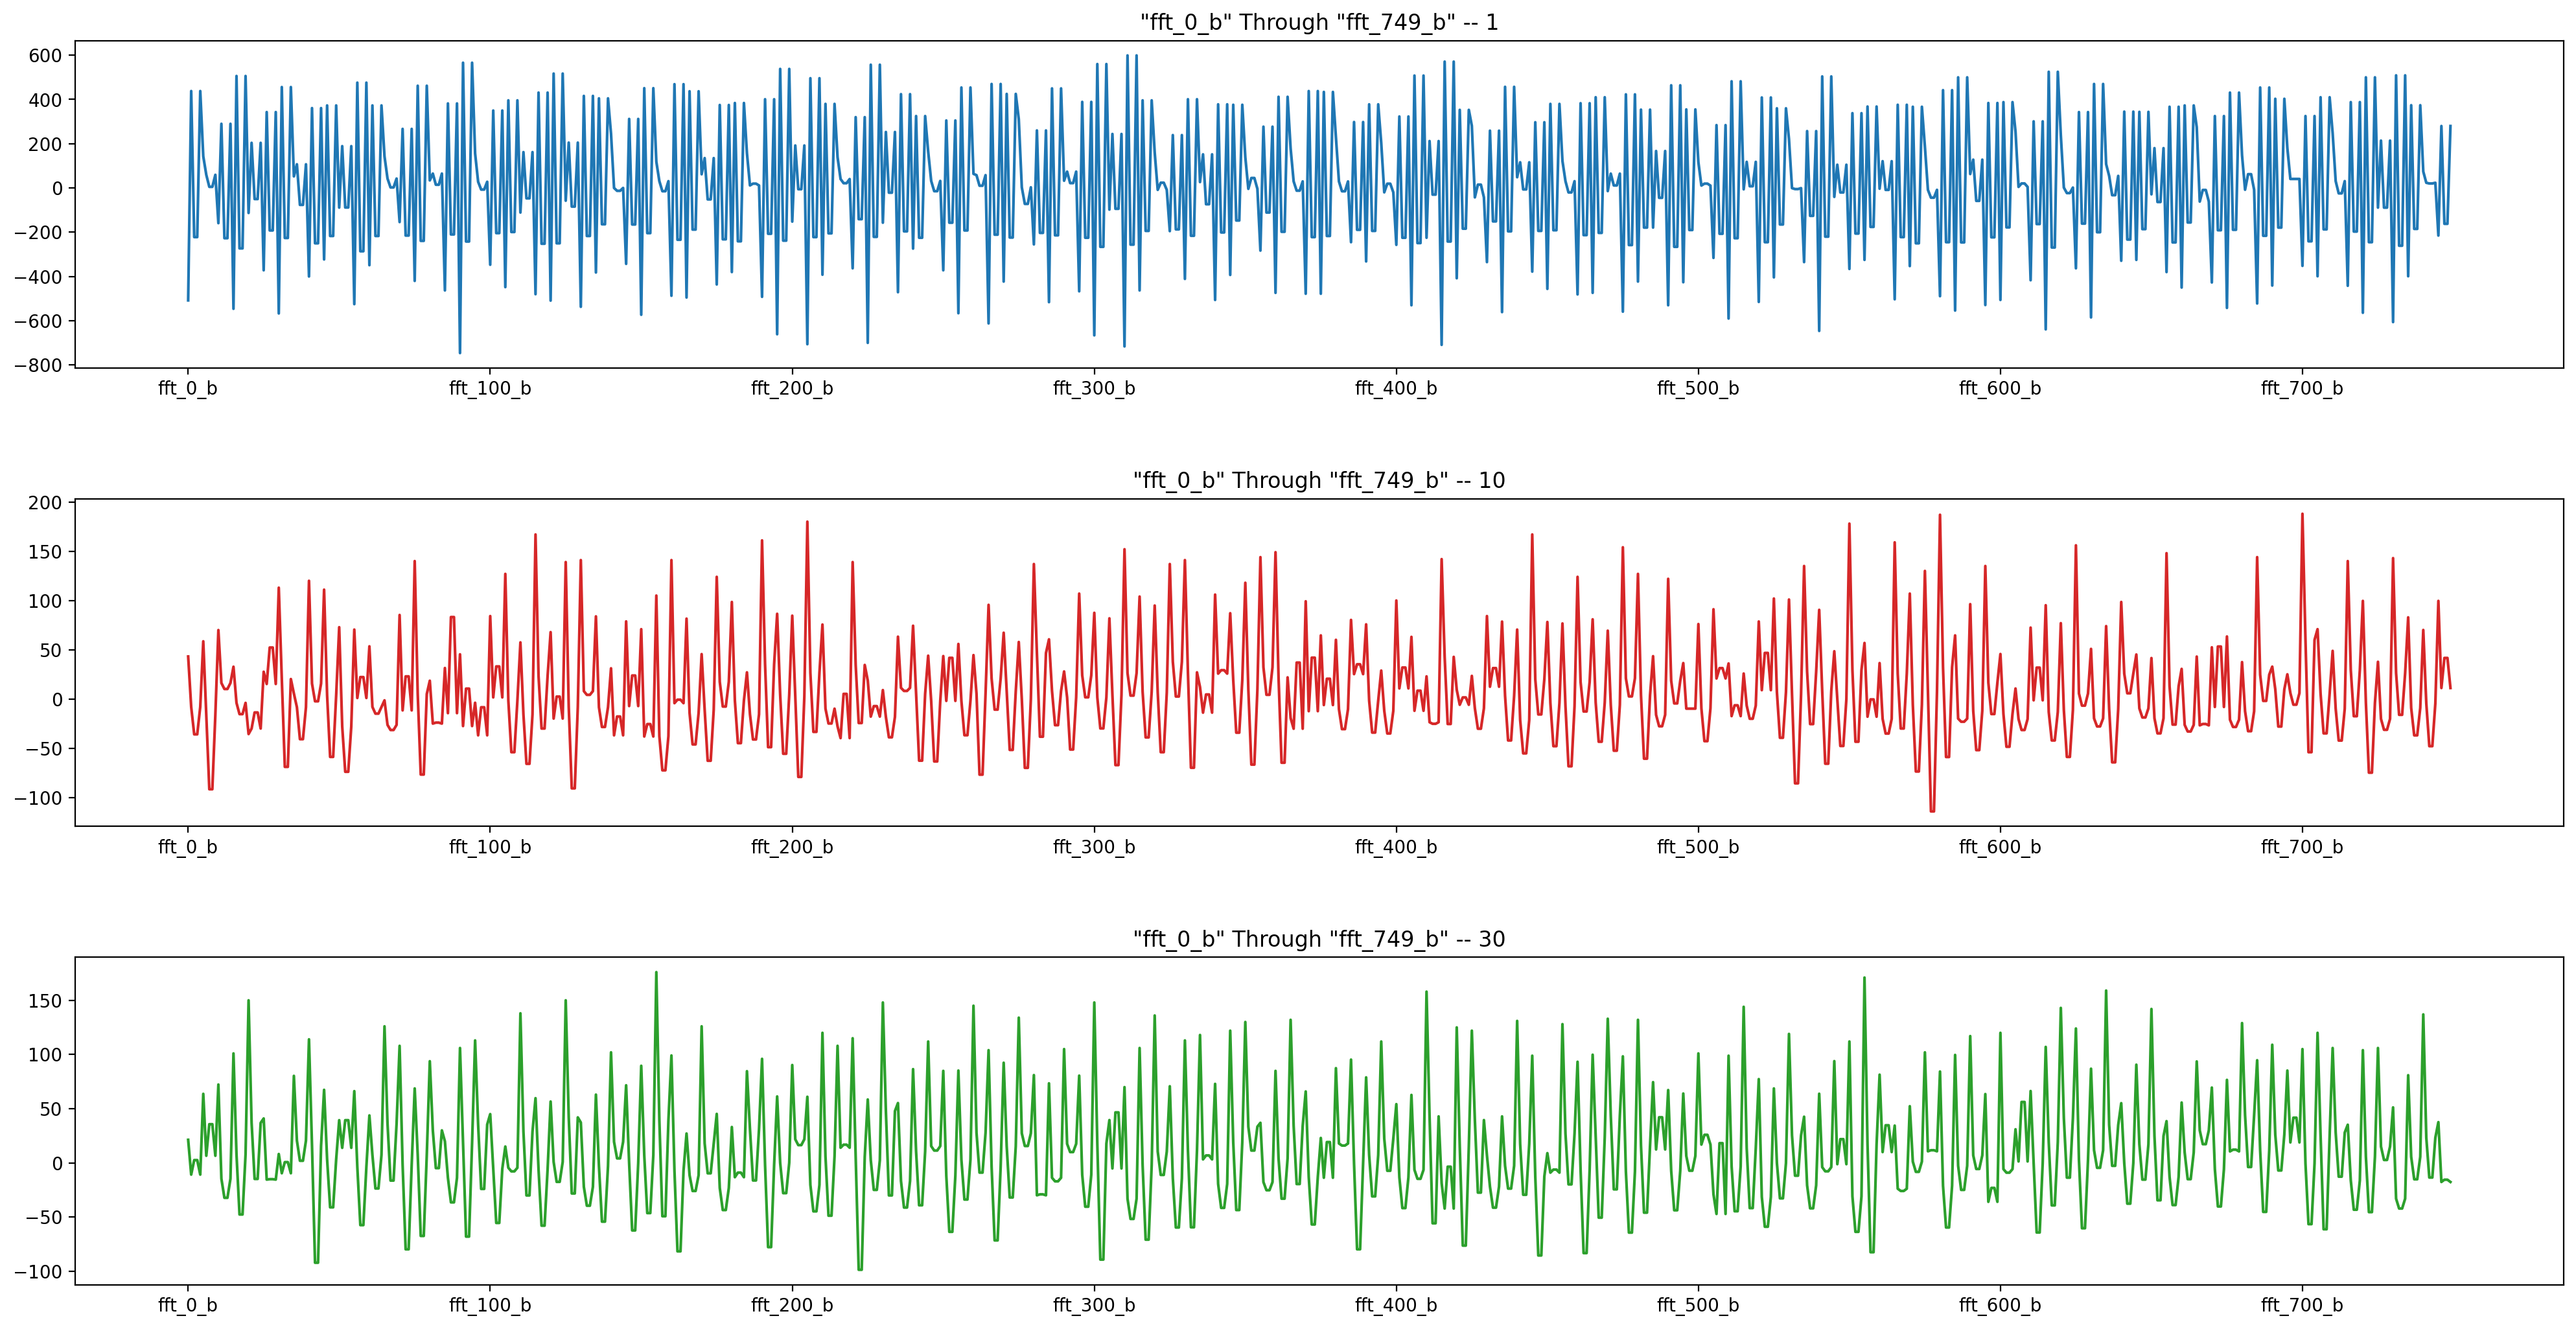

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

df.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
df.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
df.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

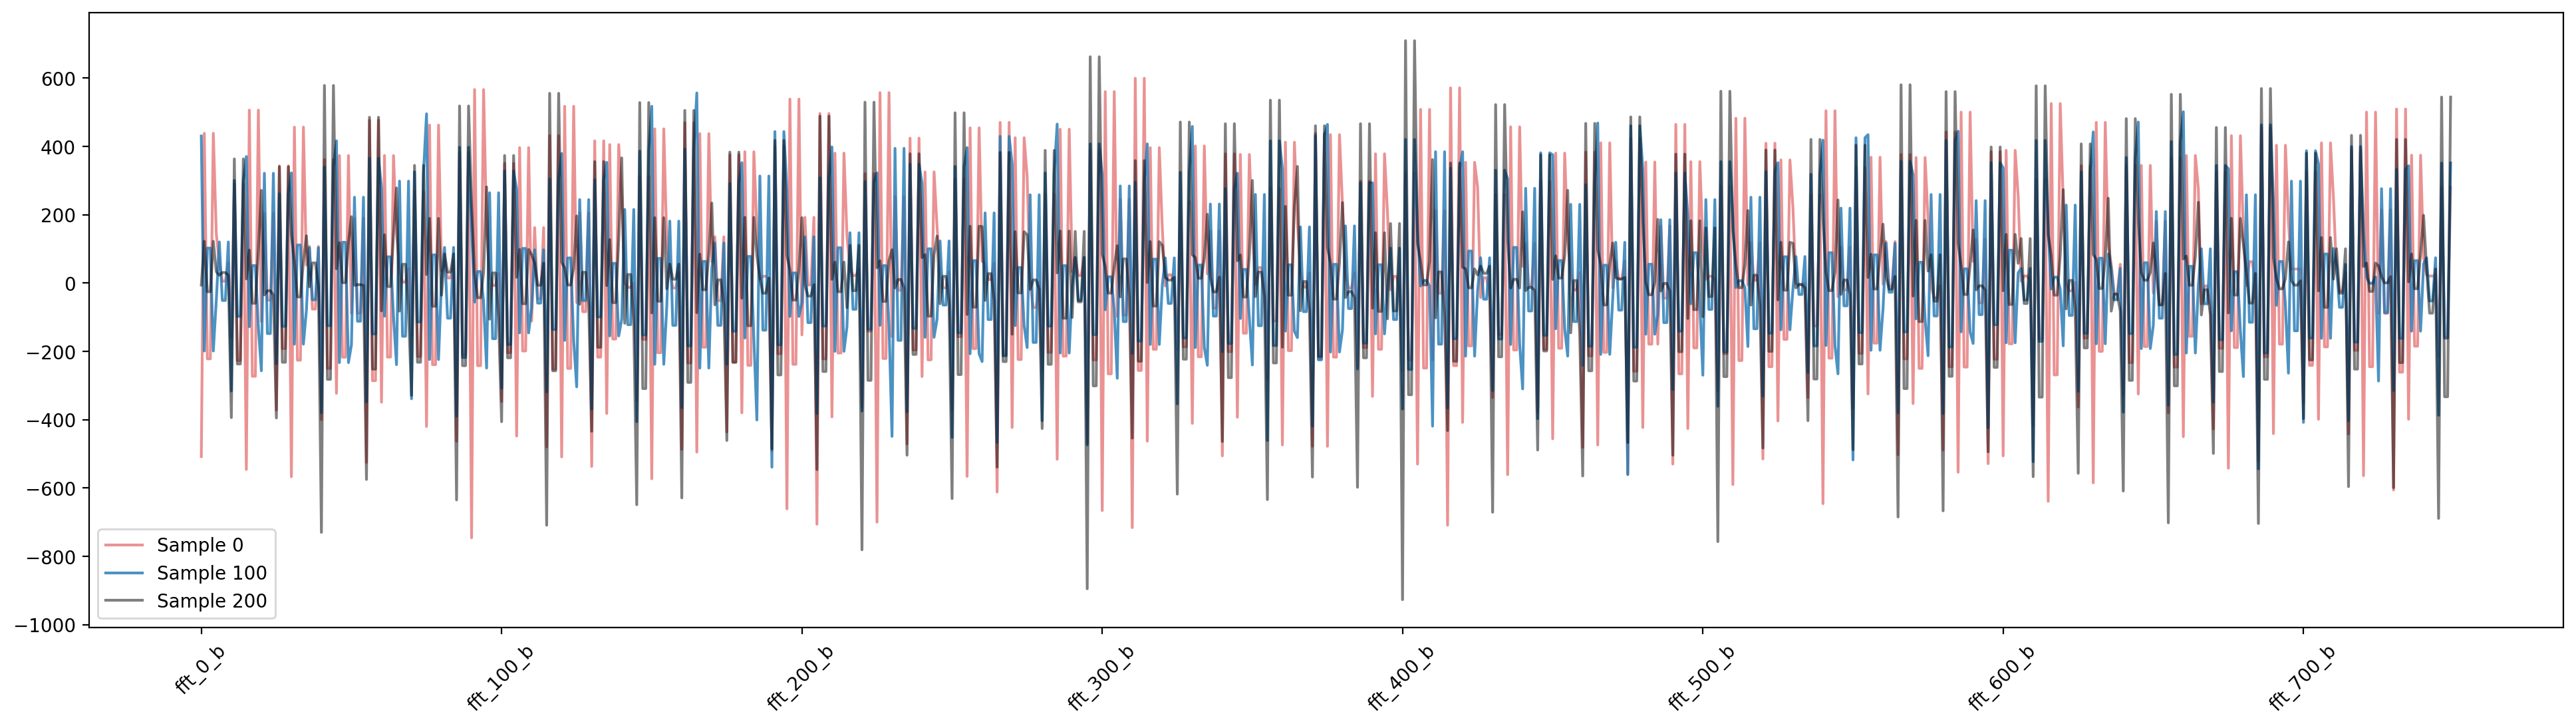

In [6]:
plt.figure(dpi=200, figsize=(24, 6))


plt.plot(df.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(df.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(df.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)


plt.xticks(np.arange(0, len(df.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')

plt.show()


No missing values found.
Class distribution in the dataset:
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64


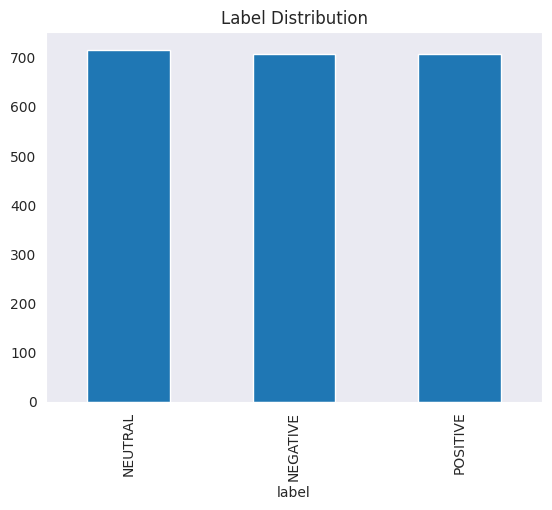

In [7]:
import warnings
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
from tensorflow.keras.layers import Dense, Flatten, LSTM, SimpleRNN, Dropout, Input
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')

# Check for missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Missing values in column: {col}")
print("No missing values found.")

# Display class distribution
print("Class distribution in the dataset:")
print(df.label.value_counts())
df.label.value_counts().plot(kind='bar', color='tab:blue', title='Label Distribution')
plt.show()

# Label Encoding
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Separate features and labels
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()





In [8]:
#Training and model view

In [9]:
#70-30

Training 70-30 model...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6061 - loss: 0.8388
Epoch 1: val_accuracy improved from -inf to 0.85045, saving model to ./best_rnn_lstm_model_70_30.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6168 - loss: 0.8222 - val_accuracy: 0.8504 - val_loss: 0.4501 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8564 - loss: 0.4273
Epoch 2: val_accuracy improved from 0.85045 to 0.87277, saving model to ./best_rnn_lstm_model_70_30.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8573 - loss: 0.4229 - val_accuracy: 0.8728 - val_loss: 0.3490 - learning_rate: 9.0484e-04
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8759 - loss: 0.3526
Epoch 3: val_accuracy improved from 0.87277 to 0.87723, saving model to ./best_rnn_lstm_model_70_30.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8771 - loss: 0.3494 - val_accuracy: 0.8772 - val_loss: 0.3207 - learning_rate: 8.1873e

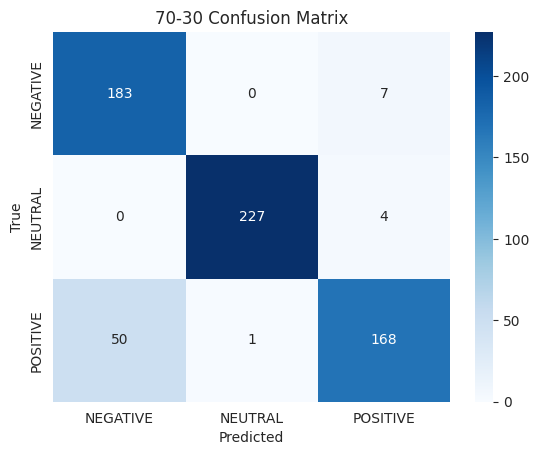

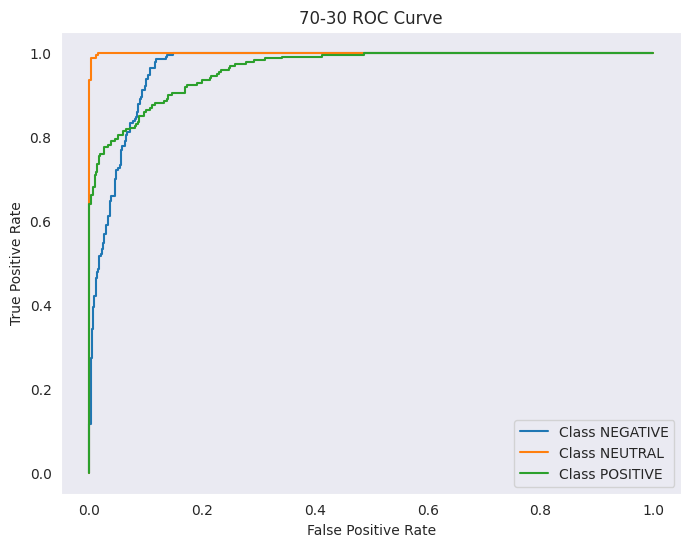


=== Metrics for 70-30 ===
   Split  Accuracy      Loss  Precision    Recall  F1 Score       AUC
0  70-30  0.903125  0.224646   0.913682  0.903125  0.902758  0.977338


In [10]:
import warnings
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.layers import Dense, Flatten, LSTM, SimpleRNN, Dropout, Input
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')

# Preprocessing
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Split data
Y = df['label'].copy()
X = df.drop('label', axis=1).copy()
X_train, x_test, Y_train, y_test = train_test_split(X, Y, random_state=111, test_size=0.3)
X_train, x_val, Y_train, y_val = train_test_split(X_train, Y_train, random_state=111, test_size=0.3)

# Reshape and preprocess
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
x_test = np.array(x_test).reshape((x_test.shape[0], x_test.shape[1], 1))
x_val = np.array(x_val).reshape((x_val.shape[0], x_val.shape[1], 1))
Y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

# Build model
i_rnn_lstm = Input(shape=(X_train.shape[1], 1))
x = SimpleRNN(128, return_sequences=True, activation='relu')(i_rnn_lstm)
x = LSTM(256, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
y_rnn_lstm = Dense(3, activation='softmax')(x)
model_rnn_lstm = Model(i_rnn_lstm, y_rnn_lstm)

# Compile model
model_rnn_lstm.compile(optimizer=Adam(learning_rate=0.001),
                       loss=['categorical_crossentropy'],
                       metrics=['accuracy'])

# Callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_rnn_lstm_model_70_30.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

# Train model
print("Training 70-30 model...")
history_70_30 = model_rnn_lstm.fit(X_train, Y_train,
                                   batch_size=128,
                                   validation_data=(x_val, y_val),
                                   epochs=100,
                                   callbacks=[es, mc, lr_schedule],
                                   verbose=1)

# Load best model
best_model_70_30 = load_model('./best_rnn_lstm_model_70_30.keras')

# Evaluate model
test_loss_70_30, test_acc_70_30 = best_model_70_30.evaluate(x_test, y_test, verbose=0)
print(f"70-30 Test Accuracy: {test_acc_70_30:.3f}")

# Predictions
y_pred_70_30 = np.argmax(best_model_70_30.predict(x_test), axis=1)
y_true_70_30 = np.argmax(y_test.values, axis=1)
y_prob_70_30 = best_model_70_30.predict(x_test)

# Metrics
classification_70_30 = classification_report(y_true_70_30, y_pred_70_30, output_dict=True)
precision_70_30 = classification_70_30['weighted avg']['precision']
recall_70_30 = classification_70_30['weighted avg']['recall']
f1_70_30 = classification_70_30['weighted avg']['f1-score']
auc_70_30 = roc_auc_score(y_test, y_prob_70_30, multi_class='ovr', average='weighted')

# Print classification report
print(f"\n70-30 Classification Report:\n")
print(classification_report(y_true_70_30, y_pred_70_30, target_names=le.classes_))

# Confusion matrix
cm_70_30 = confusion_matrix(y_true_70_30, y_pred_70_30)
sns.heatmap(cm_70_30, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("70-30 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
fpr_70_30, tpr_70_30 = {}, {}
plt.figure(figsize=(8, 6))
for i, label in enumerate(le.classes_):
    fpr_70_30[label], tpr_70_30[label], _ = roc_curve(y_test.iloc[:, i], y_prob_70_30[:, i])
    plt.plot(fpr_70_30[label], tpr_70_30[label], label=f'Class {label}')

plt.title("70-30 ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# Consolidated metrics for 70-30
metrics_70_30 = pd.DataFrame({
    'Split': ['70-30'],
    'Accuracy': [test_acc_70_30],
    'Loss': [test_loss_70_30],
    'Precision': [precision_70_30],
    'Recall': [recall_70_30],
    'F1 Score': [f1_70_30],
    'AUC': [auc_70_30]
})

print("\n=== Metrics for 70-30 ===")
print(metrics_70_30)


In [11]:
#80-20

Training 80-20 model...
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5845 - loss: 0.8746
Epoch 1: val_accuracy improved from -inf to 0.89648, saving model to ./best_rnn_lstm_model_80_20.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5965 - loss: 0.8547 - val_accuracy: 0.8965 - val_loss: 0.2992 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8649 - loss: 0.3765
Epoch 2: val_accuracy improved from 0.89648 to 0.90820, saving model to ./best_rnn_lstm_model_80_20.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8655 - loss: 0.3741 - val_accuracy: 0.9082 - val_loss: 0.2483 - learning_rate: 9.0484e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8748 - loss: 0.3129
Epoch 3: val_accuracy did not improve from 0.90820
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8746 - loss: 0.3129 - val_accuracy: 0.9082 - val_loss: 0.2458 - learning_rate: 8.1873e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 

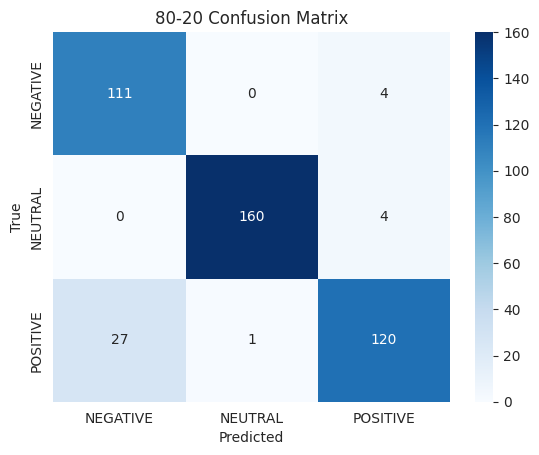

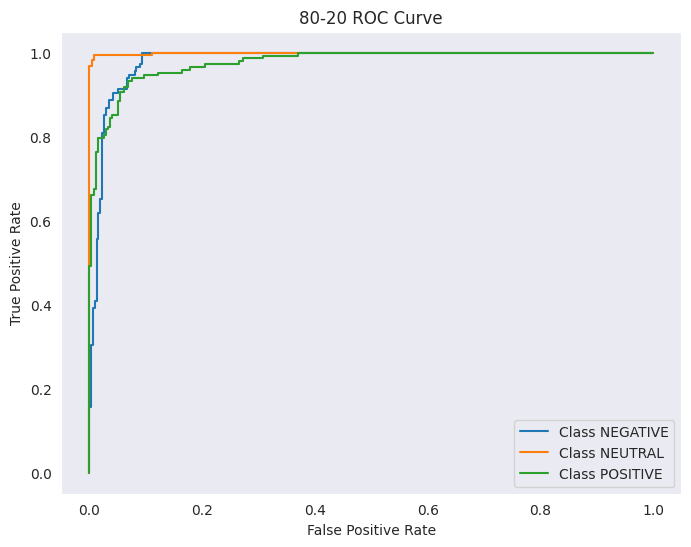


=== Metrics for 80-20 ===
   Split  Accuracy      Loss  Precision    Recall  F1 Score       AUC
0  80-20  0.915691  0.191709   0.923258  0.915691  0.915882  0.986927


In [12]:
# Load and preprocess data
X_train_80_20, x_test_80_20, Y_train_80_20, y_test_80_20 = train_test_split(X, Y, random_state=111, test_size=0.2)
X_train_80_20, x_val_80_20, Y_train_80_20, y_val_80_20 = train_test_split(X_train_80_20, Y_train_80_20, random_state=111, test_size=0.3)

# Reshape and preprocess
X_train_80_20 = np.array(X_train_80_20).reshape((X_train_80_20.shape[0], X_train_80_20.shape[1], 1))
x_test_80_20 = np.array(x_test_80_20).reshape((x_test_80_20.shape[0], x_test_80_20.shape[1], 1))
x_val_80_20 = np.array(x_val_80_20).reshape((x_val_80_20.shape[0], x_val_80_20.shape[1], 1))
Y_train_80_20 = pd.get_dummies(Y_train_80_20)
y_test_80_20 = pd.get_dummies(y_test_80_20)
y_val_80_20 = pd.get_dummies(y_val_80_20)

# Build model
i_rnn_lstm_80_20 = Input(shape=(X_train_80_20.shape[1], 1))
x = SimpleRNN(128, return_sequences=True, activation='relu')(i_rnn_lstm_80_20)
x = LSTM(256, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
y_rnn_lstm_80_20 = Dense(3, activation='softmax')(x)
model_rnn_lstm_80_20 = Model(i_rnn_lstm_80_20, y_rnn_lstm_80_20)

# Compile model
model_rnn_lstm_80_20.compile(optimizer=Adam(learning_rate=0.001),
                             loss=['categorical_crossentropy'],
                             metrics=['accuracy'])

# Callbacks
es_80_20 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc_80_20 = ModelCheckpoint('./best_rnn_lstm_model_80_20.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule_80_20 = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

# Train model
print("Training 80-20 model...")
history_80_20 = model_rnn_lstm_80_20.fit(X_train_80_20, Y_train_80_20,
                                         batch_size=128,
                                         validation_data=(x_val_80_20, y_val_80_20),
                                         epochs=100,
                                         callbacks=[es_80_20, mc_80_20, lr_schedule_80_20],
                                         verbose=1)

# Load best model
best_model_80_20 = load_model('./best_rnn_lstm_model_80_20.keras')

# Evaluate model
test_loss_80_20, test_acc_80_20 = best_model_80_20.evaluate(x_test_80_20, y_test_80_20, verbose=0)
print(f"80-20 Test Accuracy: {test_acc_80_20:.3f}")

# Predictions
y_pred_80_20 = np.argmax(best_model_80_20.predict(x_test_80_20), axis=1)
y_true_80_20 = np.argmax(y_test_80_20.values, axis=1)
y_prob_80_20 = best_model_80_20.predict(x_test_80_20)

# Metrics
classification_80_20 = classification_report(y_true_80_20, y_pred_80_20, output_dict=True)
precision_80_20 = classification_80_20['weighted avg']['precision']
recall_80_20 = classification_80_20['weighted avg']['recall']
f1_80_20 = classification_80_20['weighted avg']['f1-score']
auc_80_20 = roc_auc_score(y_test_80_20, y_prob_80_20, multi_class='ovr', average='weighted')

# Print classification report
print(f"\n80-20 Classification Report:\n")
print(classification_report(y_true_80_20, y_pred_80_20, target_names=le.classes_))

# Confusion matrix
cm_80_20 = confusion_matrix(y_true_80_20, y_pred_80_20)
sns.heatmap(cm_80_20, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("80-20 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
fpr_80_20, tpr_80_20 = {}, {}
plt.figure(figsize=(8, 6))
for i, label in enumerate(le.classes_):
    fpr_80_20[label], tpr_80_20[label], _ = roc_curve(y_test_80_20.iloc[:, i], y_prob_80_20[:, i])
    plt.plot(fpr_80_20[label], tpr_80_20[label], label=f'Class {label}')

plt.title("80-20 ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# Consolidated metrics for 80-20
metrics_80_20 = pd.DataFrame({
    'Split': ['80-20'],
    'Accuracy': [test_acc_80_20],
    'Loss': [test_loss_80_20],
    'Precision': [precision_80_20],
    'Recall': [recall_80_20],
    'F1 Score': [f1_80_20],
    'AUC': [auc_80_20]
})

print("\n=== Metrics for 80-20 ===")
print(metrics_80_20)


In [13]:
#90-10

Training 90-10 model...
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6003 - loss: 0.8687
Epoch 1: val_accuracy improved from -inf to 0.84896, saving model to ./best_rnn_lstm_model_90_10.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6105 - loss: 0.8507 - val_accuracy: 0.8490 - val_loss: 0.4111 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8529 - loss: 0.3680
Epoch 2: val_accuracy improved from 0.84896 to 0.86632, saving model to ./best_rnn_lstm_model_90_10.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8535 - loss: 0.3662 - val_accuracy: 0.8663 - val_loss: 0.3271 - learning_rate: 9.0484e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8753 - loss: 0.3011
Epoch 3: val_accuracy improved from 0.86632 to 0.86979, saving model to ./best_rnn_lstm_model_90_10.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8760 - loss: 0.3004 - val_accuracy: 0.8698 - val_loss: 0.3167 - learning_r

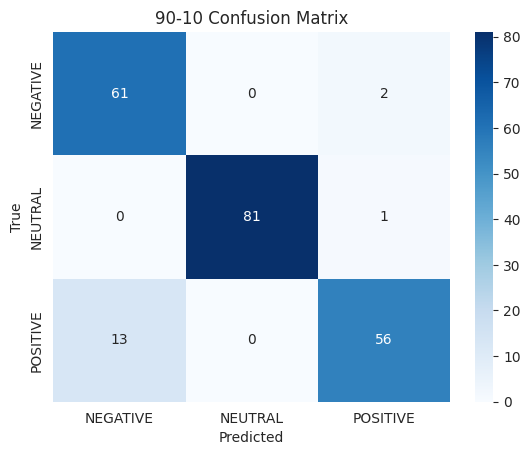

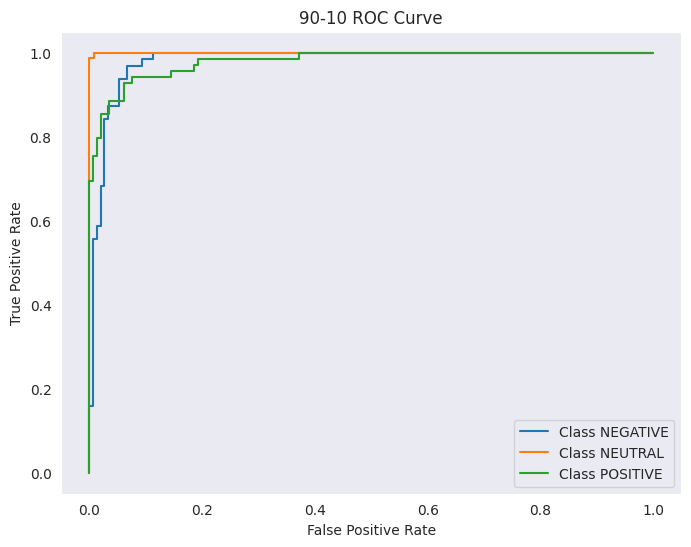


=== Metrics for 90-10 ===
   Split  Accuracy      Loss  Precision    Recall  F1 Score       AUC
0  90-10  0.925234  0.172961   0.931888  0.925234  0.925113  0.987949


In [14]:
# Load and preprocess data
X_train_90_10, x_test_90_10, Y_train_90_10, y_test_90_10 = train_test_split(X, Y, random_state=111, test_size=0.1)
X_train_90_10, x_val_90_10, Y_train_90_10, y_val_90_10 = train_test_split(X_train_90_10, Y_train_90_10, random_state=111, test_size=0.3)

# Reshape and preprocess
X_train_90_10 = np.array(X_train_90_10).reshape((X_train_90_10.shape[0], X_train_90_10.shape[1], 1))
x_test_90_10 = np.array(x_test_90_10).reshape((x_test_90_10.shape[0], x_test_90_10.shape[1], 1))
x_val_90_10 = np.array(x_val_90_10).reshape((x_val_90_10.shape[0], x_val_90_10.shape[1], 1))
Y_train_90_10 = pd.get_dummies(Y_train_90_10)
y_test_90_10 = pd.get_dummies(y_test_90_10)
y_val_90_10 = pd.get_dummies(y_val_90_10)

# Build model
i_rnn_lstm_90_10 = Input(shape=(X_train_90_10.shape[1], 1))
x = SimpleRNN(128, return_sequences=True, activation='relu')(i_rnn_lstm_90_10)
x = LSTM(256, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
y_rnn_lstm_90_10 = Dense(3, activation='softmax')(x)
model_rnn_lstm_90_10 = Model(i_rnn_lstm_90_10, y_rnn_lstm_90_10)

# Compile model
model_rnn_lstm_90_10.compile(optimizer=Adam(learning_rate=0.001),
                             loss=['categorical_crossentropy'],
                             metrics=['accuracy'])

# Callbacks
es_90_10 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc_90_10 = ModelCheckpoint('./best_rnn_lstm_model_90_10.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule_90_10 = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

# Train model
print("Training 90-10 model...")
history_90_10 = model_rnn_lstm_90_10.fit(X_train_90_10, Y_train_90_10,
                                         batch_size=128,
                                         validation_data=(x_val_90_10, y_val_90_10),
                                         epochs=100,
                                         callbacks=[es_90_10, mc_90_10, lr_schedule_90_10],
                                         verbose=1)

# Load best model
best_model_90_10 = load_model('./best_rnn_lstm_model_90_10.keras')

# Evaluate model
test_loss_90_10, test_acc_90_10 = best_model_90_10.evaluate(x_test_90_10, y_test_90_10, verbose=0)
print(f"90-10 Test Accuracy: {test_acc_90_10:.3f}")

# Predictions
y_pred_90_10 = np.argmax(best_model_90_10.predict(x_test_90_10), axis=1)
y_true_90_10 = np.argmax(y_test_90_10.values, axis=1)
y_prob_90_10 = best_model_90_10.predict(x_test_90_10)

# Metrics
classification_90_10 = classification_report(y_true_90_10, y_pred_90_10, output_dict=True)
precision_90_10 = classification_90_10['weighted avg']['precision']
recall_90_10 = classification_90_10['weighted avg']['recall']
f1_90_10 = classification_90_10['weighted avg']['f1-score']
auc_90_10 = roc_auc_score(y_test_90_10, y_prob_90_10, multi_class='ovr', average='weighted')

# Print classification report
print(f"\n90-10 Classification Report:\n")
print(classification_report(y_true_90_10, y_pred_90_10, target_names=le.classes_))

# Confusion matrix
cm_90_10 = confusion_matrix(y_true_90_10, y_pred_90_10)
sns.heatmap(cm_90_10, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("90-10 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
fpr_90_10, tpr_90_10 = {}, {}
plt.figure(figsize=(8, 6))
for i, label in enumerate(le.classes_):
    fpr_90_10[label], tpr_90_10[label], _ = roc_curve(y_test_90_10.iloc[:, i], y_prob_90_10[:, i])
    plt.plot(fpr_90_10[label], tpr_90_10[label], label=f'Class {label}')

plt.title("90-10 ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# Consolidated metrics for 90-10
metrics_90_10 = pd.DataFrame({
    'Split': ['90-10'],
    'Accuracy': [test_acc_90_10],
    'Loss': [test_loss_90_10],
    'Precision': [precision_90_10],
    'Recall': [recall_90_10],
    'F1 Score': [f1_90_10],
    'AUC': [auc_90_10]
})

print("\n=== Metrics for 90-10 ===")
print(metrics_90_10)


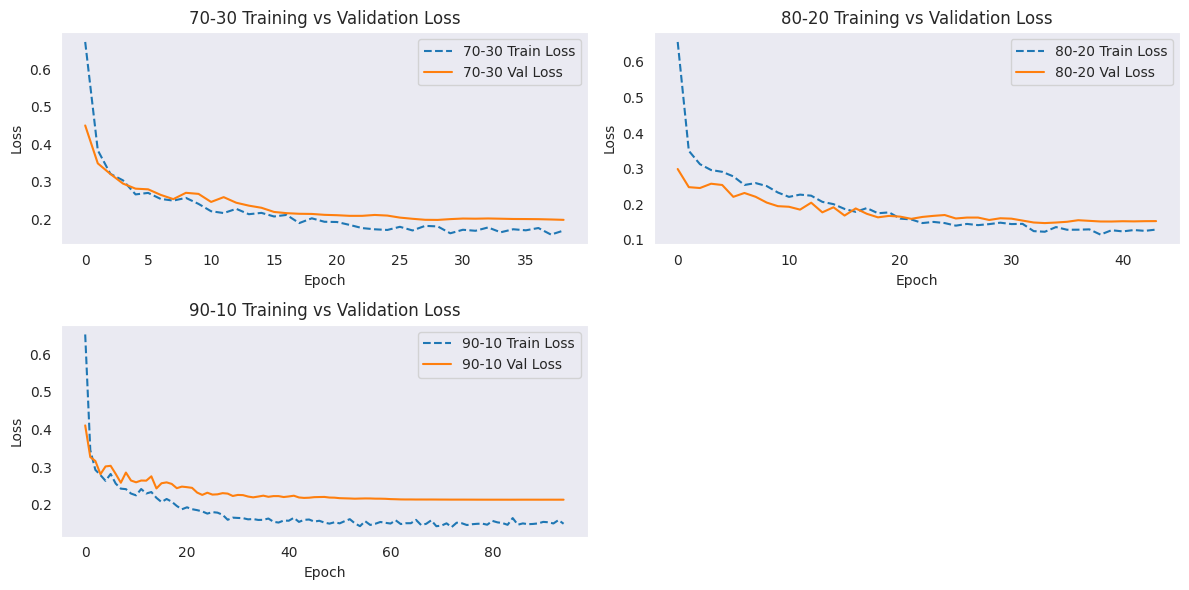

In [15]:
# Training vs Validation Loss for 70-30, 80-20, and 90-10
plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
plt.plot(history_70_30.history['loss'], label='70-30 Train Loss', linestyle='--')
plt.plot(history_70_30.history['val_loss'], label='70-30 Val Loss', linestyle='-')
plt.title('70-30 Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(history_80_20.history['loss'], label='80-20 Train Loss', linestyle='--')
plt.plot(history_80_20.history['val_loss'], label='80-20 Val Loss', linestyle='-')
plt.title('80-20 Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(history_90_10.history['loss'], label='90-10 Train Loss', linestyle='--')
plt.plot(history_90_10.history['val_loss'], label='90-10 Val Loss', linestyle='-')
plt.title('90-10 Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


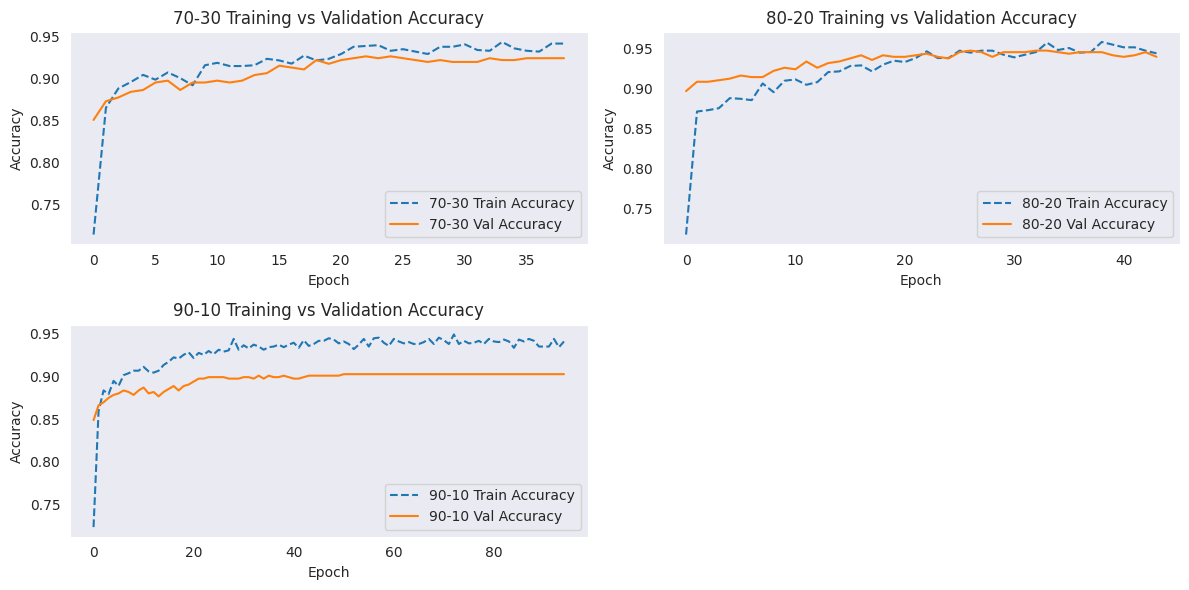

In [16]:
# Training vs Validation Accuracy for 70-30, 80-20, and 90-10
plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
plt.plot(history_70_30.history['accuracy'], label='70-30 Train Accuracy', linestyle='--')
plt.plot(history_70_30.history['val_accuracy'], label='70-30 Val Accuracy', linestyle='-')
plt.title('70-30 Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(history_80_20.history['accuracy'], label='80-20 Train Accuracy', linestyle='--')
plt.plot(history_80_20.history['val_accuracy'], label='80-20 Val Accuracy', linestyle='-')
plt.title('80-20 Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(history_90_10.history['accuracy'], label='90-10 Train Accuracy', linestyle='--')
plt.plot(history_90_10.history['val_accuracy'], label='90-10 Val Accuracy', linestyle='-')
plt.title('90-10 Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


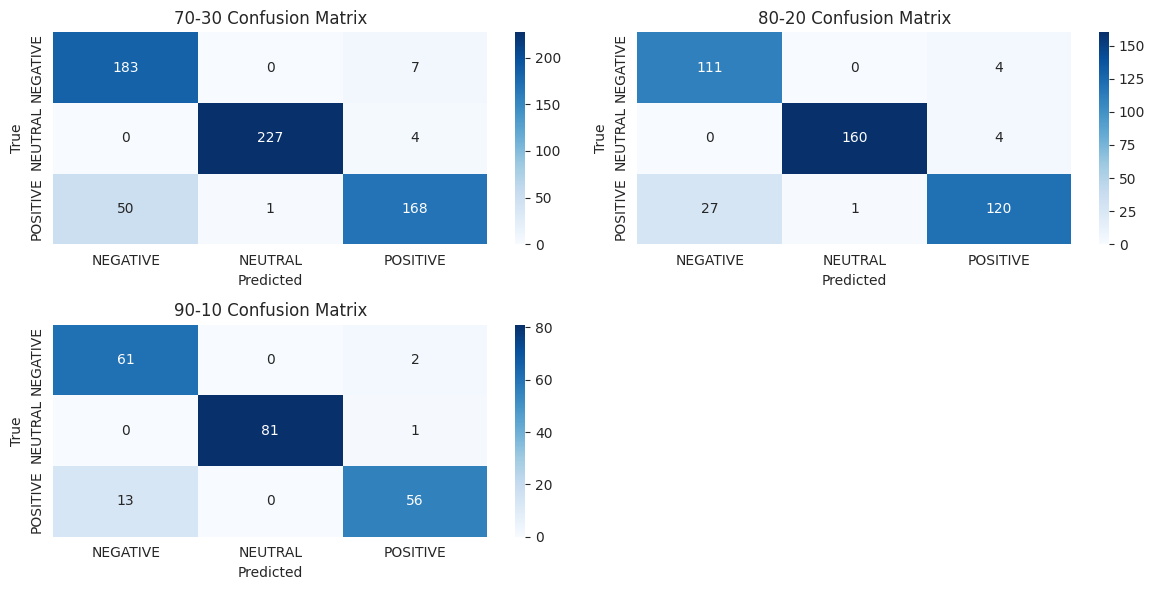

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for 70-30, 80-20, 90-10
cm_70_30 = confusion_matrix(y_true_70_30, y_pred_70_30)
cm_80_20 = confusion_matrix(y_true_80_20, y_pred_80_20)
cm_90_10 = confusion_matrix(y_true_90_10, y_pred_90_10)

# Plot confusion matrices
plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
sns.heatmap(cm_70_30, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("70-30 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")


plt.subplot(2, 2, 2)
sns.heatmap(cm_80_20, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("80-20 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")


plt.subplot(2, 2, 3)
sns.heatmap(cm_90_10, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("90-10 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import average_precision_score

# Calculate mAP for each model (assuming y_prob_* are the predicted probabilities)
map_70_30 = average_precision_score(y_test, y_prob_70_30, average='macro')
map_80_20 = average_precision_score(y_test_80_20, y_prob_80_20, average='macro')
map_90_10 = average_precision_score(y_test_90_10, y_prob_90_10, average='macro')

# Print mAP values
print(f"70-30 mAP: {map_70_30:.3f}")
print(f"80-20 mAP: {map_80_20:.3f}")
print(f"90-10 mAP: {map_90_10:.3f}")

# You can include this in a consolidated table if needed.


70-30 mAP: 0.950
80-20 mAP: 0.966
90-10 mAP: 0.969


In [19]:
from sklearn.metrics import classification_report

# Classification Report for each case
print("Classification Report for 70-30:")
print(classification_report(y_true_70_30, y_pred_70_30))
print("\nClassification Report for 80-20:")
print(classification_report(y_true_80_20, y_pred_80_20))
print("\nClassification Report for 90-10:")
print(classification_report(y_true_90_10, y_pred_90_10))


Classification Report for 70-30:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       190
           1       1.00      0.98      0.99       231
           2       0.94      0.77      0.84       219

    accuracy                           0.90       640
   macro avg       0.91      0.90      0.90       640
weighted avg       0.91      0.90      0.90       640


Classification Report for 80-20:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       115
           1       0.99      0.98      0.98       164
           2       0.94      0.81      0.87       148

    accuracy                           0.92       427
   macro avg       0.91      0.92      0.91       427
weighted avg       0.92      0.92      0.92       427


Classification Report for 90-10:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        63
           1       1.00     

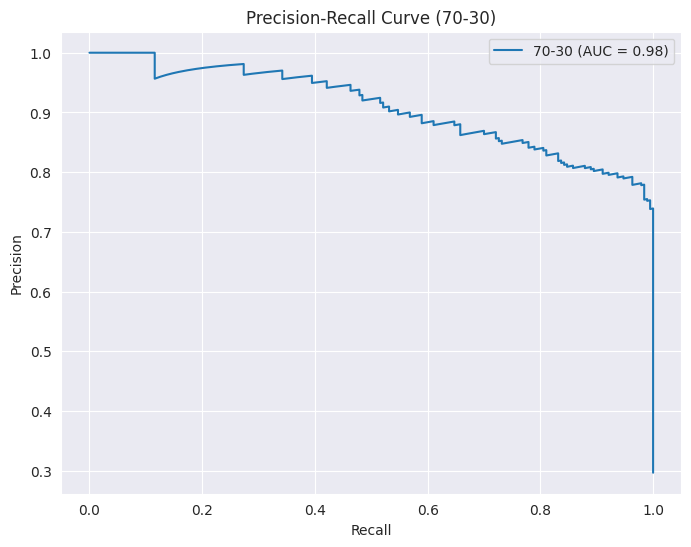

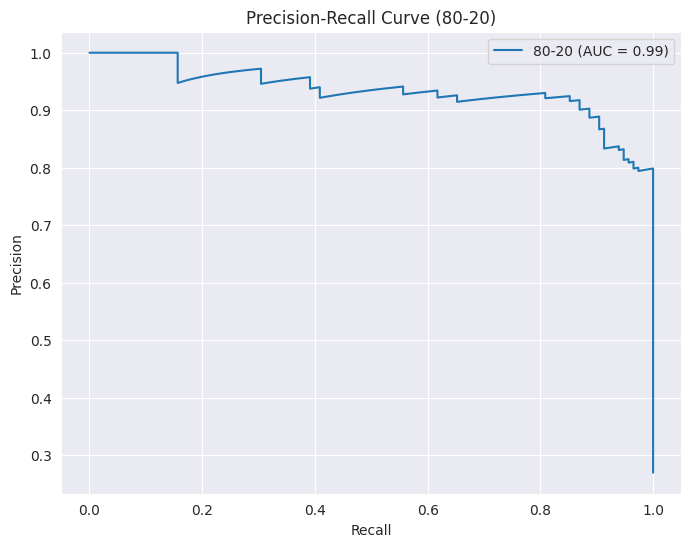

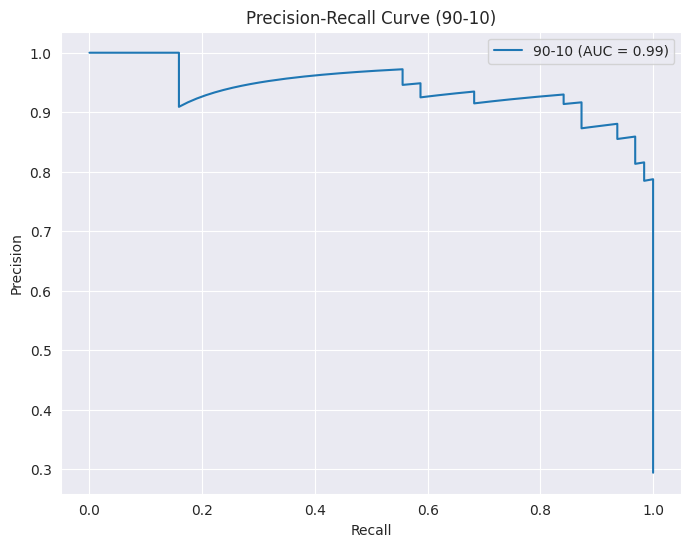

In [20]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall Curve for each case
precision_70_30, recall_70_30, _ = precision_recall_curve(y_test.iloc[:, 0], y_prob_70_30[:, 0])
precision_80_20, recall_80_20, _ = precision_recall_curve(y_test_80_20.iloc[:, 0], y_prob_80_20[:, 0])
precision_90_10, recall_90_10, _ = precision_recall_curve(y_test_90_10.iloc[:, 0], y_prob_90_10[:, 0])

# Plot Precision-Recall Curve for 70-30, 80-20, and 90-10
plt.figure(figsize=(8, 6))
plt.plot(recall_70_30, precision_70_30, label=f'70-30 (AUC = {auc_70_30:.2f})')
plt.title('Precision-Recall Curve (70-30)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(recall_80_20, precision_80_20, label=f'80-20 (AUC = {auc_80_20:.2f})')
plt.title('Precision-Recall Curve (80-20)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(recall_90_10, precision_90_10, label=f'90-10 (AUC = {auc_90_10:.2f})')
plt.title('Precision-Recall Curve (90-10)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 778ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 745ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 822ms/step


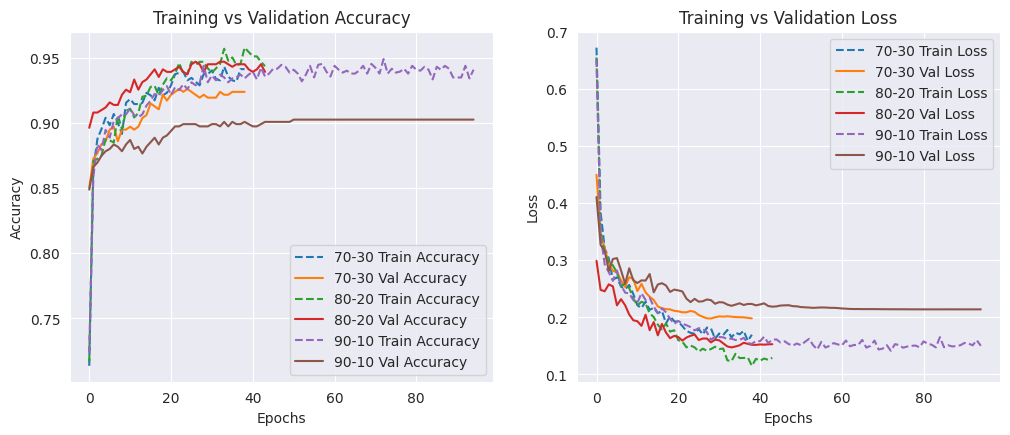

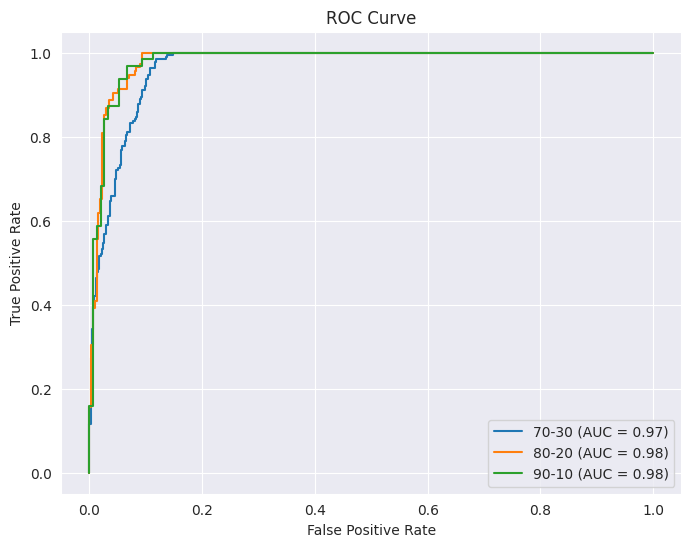

<Figure size 640x480 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report
import pandas as pd

# Combine Training vs Validation Accuracy and Loss in a single plot
plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
plt.plot(history_70_30.history['accuracy'], label='70-30 Train Accuracy', linestyle='--')
plt.plot(history_70_30.history['val_accuracy'], label='70-30 Val Accuracy', linestyle='-')
plt.plot(history_80_20.history['accuracy'], label='80-20 Train Accuracy', linestyle='--')
plt.plot(history_80_20.history['val_accuracy'], label='80-20 Val Accuracy', linestyle='-')
plt.plot(history_90_10.history['accuracy'], label='90-10 Train Accuracy', linestyle='--')
plt.plot(history_90_10.history['val_accuracy'], label='90-10 Val Accuracy', linestyle='-')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(history_70_30.history['loss'], label='70-30 Train Loss', linestyle='--')
plt.plot(history_70_30.history['val_loss'], label='70-30 Val Loss', linestyle='-')
plt.plot(history_80_20.history['loss'], label='80-20 Train Loss', linestyle='--')
plt.plot(history_80_20.history['val_loss'], label='80-20 Val Loss', linestyle='-')
plt.plot(history_90_10.history['loss'], label='90-10 Train Loss', linestyle='--')
plt.plot(history_90_10.history['val_loss'], label='90-10 Val Loss', linestyle='-')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Predictions for each model
y_prob_70_30 = best_model_70_30.predict(x_test)
y_prob_80_20 = best_model_80_20.predict(x_test_80_20)  # Correct variable for 80-20 split
y_prob_90_10 = best_model_90_10.predict(x_test_90_10)  # Correct variable for 90-10 split

# Ensure predictions are in the correct format
y_pred_70_30 = np.argmax(y_prob_70_30, axis=1)
y_pred_80_20 = np.argmax(y_prob_80_20, axis=1)
y_pred_90_10 = np.argmax(y_prob_90_10, axis=1)

# ROC curve calculation (using the correct test sets for each case)
fpr_70_30, tpr_70_30, _ = roc_curve(y_test.iloc[:, 0], y_prob_70_30[:, 0])
fpr_80_20, tpr_80_20, _ = roc_curve(y_test_80_20.iloc[:, 0], y_prob_80_20[:, 0])  # Correct variable
fpr_90_10, tpr_90_10, _ = roc_curve(y_test_90_10.iloc[:, 0], y_prob_90_10[:, 0])  # Correct variable

# Calculate AUC for each case
auc_70_30 = auc(fpr_70_30, tpr_70_30)
auc_80_20 = auc(fpr_80_20, tpr_80_20)
auc_90_10 = auc(fpr_90_10, tpr_90_10)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_70_30, tpr_70_30, label=f'70-30 (AUC = {auc_70_30:.2f})')
plt.plot(fpr_80_20, tpr_80_20, label=f'80-20 (AUC = {auc_80_20:.2f})')
plt.plot(fpr_90_10, tpr_90_10, label=f'90-10 (AUC = {auc_90_10:.2f})')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()




plt.tight_layout()
plt.show()





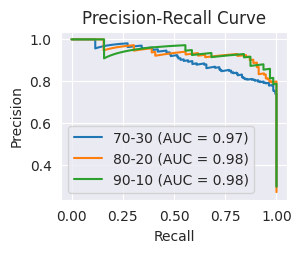

In [22]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall for each model
precision_70_30, recall_70_30, _ = precision_recall_curve(y_test.iloc[:, 0], y_prob_70_30[:, 0])
precision_80_20, recall_80_20, _ = precision_recall_curve(y_test_80_20.iloc[:, 0], y_prob_80_20[:, 0])  # Correct variable for 80-20
precision_90_10, recall_90_10, _ = precision_recall_curve(y_test_90_10.iloc[:, 0], y_prob_90_10[:, 0])  # Correct variable for 90-10

# Plot Precision-Recall curve
plt.subplot(2, 2, 4)
plt.plot(recall_70_30, precision_70_30, label=f'70-30 (AUC = {auc_70_30:.2f})')
plt.plot(recall_80_20, precision_80_20, label=f'80-20 (AUC = {auc_80_20:.2f})')
plt.plot(recall_90_10, precision_90_10, label=f'90-10 (AUC = {auc_90_10:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


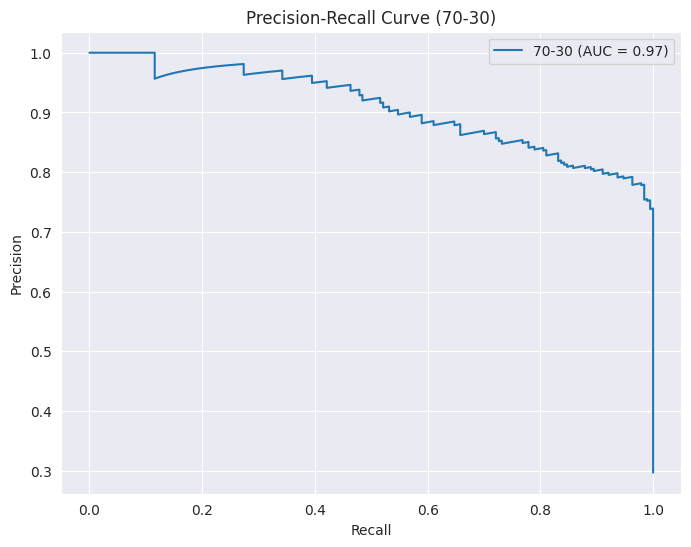

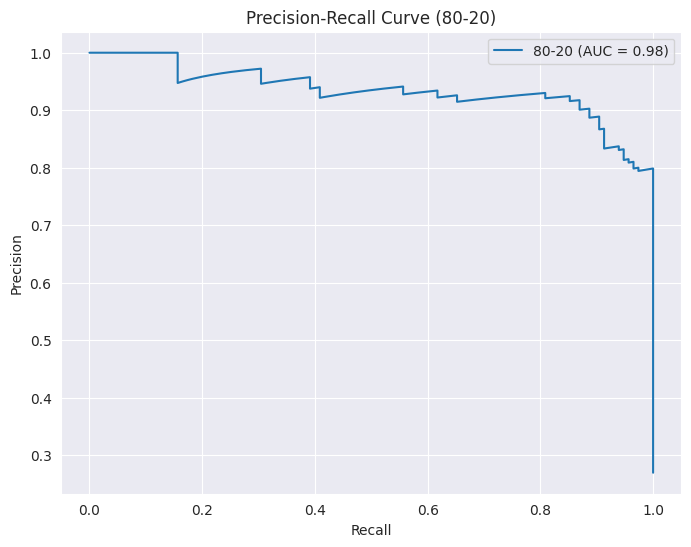

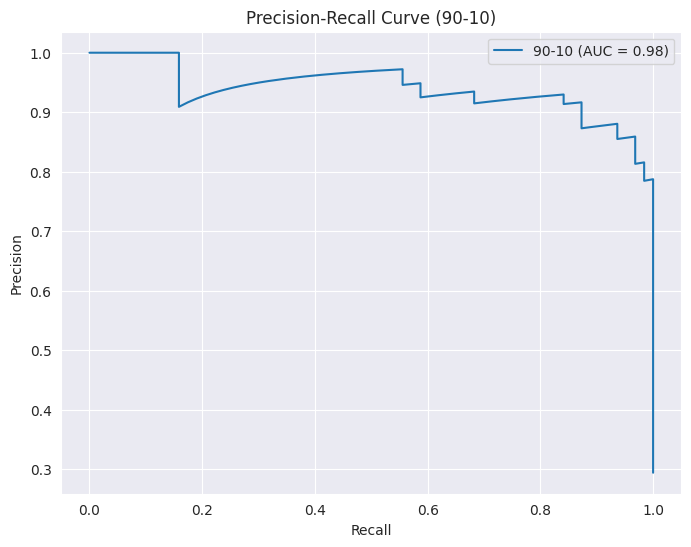

In [23]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall Curve for each case
precision_70_30, recall_70_30, _ = precision_recall_curve(y_test.iloc[:, 0], y_prob_70_30[:, 0])
precision_80_20, recall_80_20, _ = precision_recall_curve(y_test_80_20.iloc[:, 0], y_prob_80_20[:, 0])
precision_90_10, recall_90_10, _ = precision_recall_curve(y_test_90_10.iloc[:, 0], y_prob_90_10[:, 0])

# Plot Precision-Recall Curve for 70-30, 80-20, and 90-10
plt.figure(figsize=(8, 6))
plt.plot(recall_70_30, precision_70_30, label=f'70-30 (AUC = {auc_70_30:.2f})')
plt.title('Precision-Recall Curve (70-30)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

# Plot Precision-Recall Curve for 80-20
plt.figure(figsize=(8, 6))
plt.plot(recall_80_20, precision_80_20, label=f'80-20 (AUC = {auc_80_20:.2f})')
plt.title('Precision-Recall Curve (80-20)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

# Plot Precision-Recall Curve for 90-10
plt.figure(figsize=(8, 6))
plt.plot(recall_90_10, precision_90_10, label=f'90-10 (AUC = {auc_90_10:.2f})')
plt.title('Precision-Recall Curve (90-10)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


In [24]:
from sklearn.metrics import f1_score

# F1 Score for each case
f1_70_30 = f1_score(y_true_70_30, y_pred_70_30, average='macro')
f1_80_20 = f1_score(y_true_80_20, y_pred_80_20, average='macro')
f1_90_10 = f1_score(y_true_90_10, y_pred_90_10, average='macro')

# Print F1 Scores
print(f"F1 Score for 70-30: {f1_70_30:.3f}")
print(f"F1 Score for 80-20: {f1_80_20:.3f}")
print(f"F1 Score for 90-10: {f1_90_10:.3f}")


F1 Score for 70-30: 0.900
F1 Score for 80-20: 0.911
F1 Score for 90-10: 0.920


In [25]:
from sklearn.metrics import classification_report

# Classification Report for 70-30
print("Classification Report for 70-30:")
print(classification_report(y_true_70_30, y_pred_70_30))

# Classification Report for 80-20
print("\nClassification Report for 80-20:")
print(classification_report(y_true_80_20, y_pred_80_20))

# Classification Report for 90-10
print("\nClassification Report for 90-10:")
print(classification_report(y_true_90_10, y_pred_90_10))


Classification Report for 70-30:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       190
           1       1.00      0.98      0.99       231
           2       0.94      0.77      0.84       219

    accuracy                           0.90       640
   macro avg       0.91      0.90      0.90       640
weighted avg       0.91      0.90      0.90       640


Classification Report for 80-20:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       115
           1       0.99      0.98      0.98       164
           2       0.94      0.81      0.87       148

    accuracy                           0.92       427
   macro avg       0.91      0.92      0.91       427
weighted avg       0.92      0.92      0.92       427


Classification Report for 90-10:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        63
           1       1.00     